# Importowanie bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from hax.utils.statistics import Statistics
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

## Pobranie danych

In [2]:
path = "statistics\\DOUBLE_MEM_BIGGER_LR_BLUESSI_VS_LEARNED_REDALDO_SMALL"
title = "240 MEM 10x LR"
experiences, actorLosses, criticLosses = Statistics.load(path)
print(len(experiences))
print(len(criticLosses))
print(len(actorLosses))
print()

pathToCompare = "statistics\\BLUESSI_VS_LEARNED_REDALDO_SMALL"
titleC = "120 MEM"
experiencesC, actorLossesC, criticLossesC = Statistics.load(pathToCompare, len(experiences))
print(len(experiencesC))
print(len(criticLossesC))
print(len(actorLossesC))


1953094
29409
29409

1953094
117874
117874


# Wykresy

195309.4


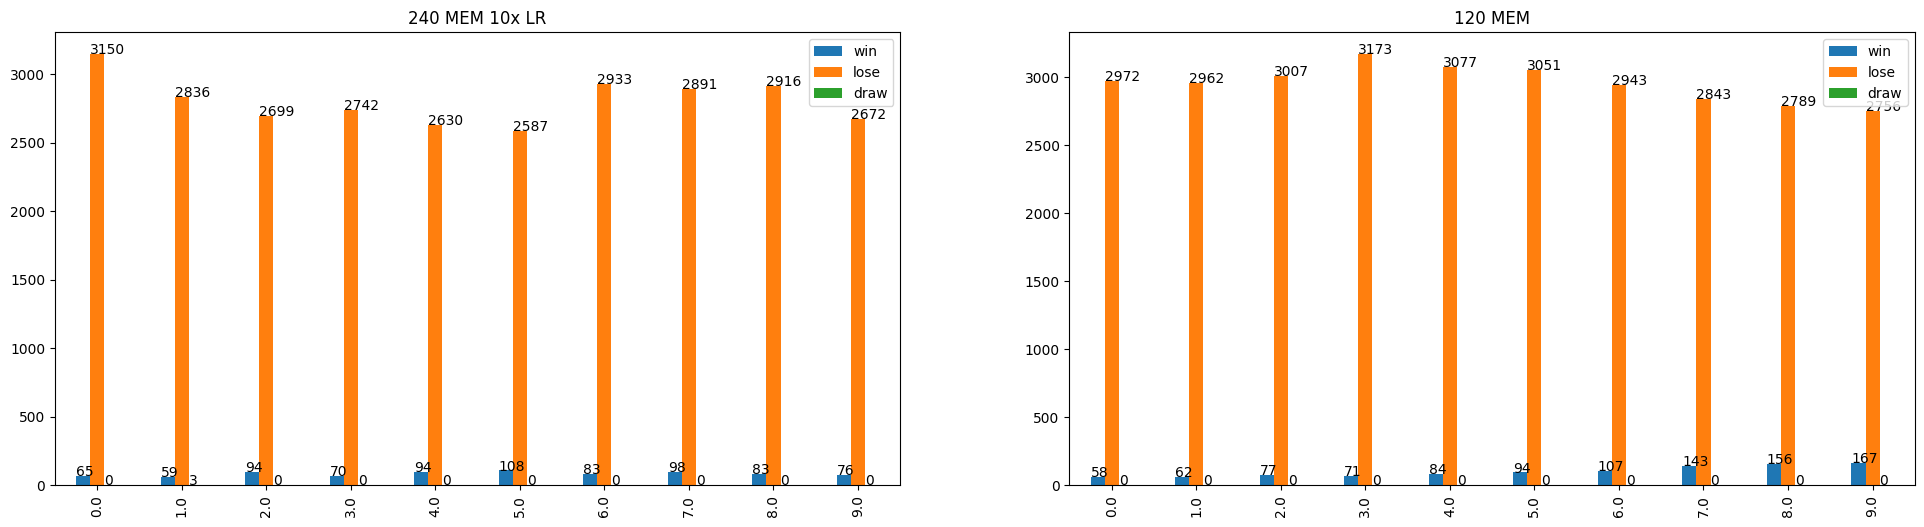

In [3]:
groups = 10
groupSize = experiences.shape[0] / groups
print(groupSize)
groupedMemories = experiences.groupby(experiences.index // groupSize).sum()
groupedMemoriesC = experiencesC.groupby(experiencesC.index // groupSize).sum()
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(24,6))
mems = groupedMemories[["win", "lose", "draw"]].plot.bar(ax=axes[0], title=title)
memsC = groupedMemoriesC[["win", "lose", "draw"]].plot.bar(ax=axes[1], title=titleC)
for p in mems.patches:
    mems.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.05))
for p in memsC.patches:
    memsC.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.05))

<AxesSubplot:title={'center':'120 MEM'}>

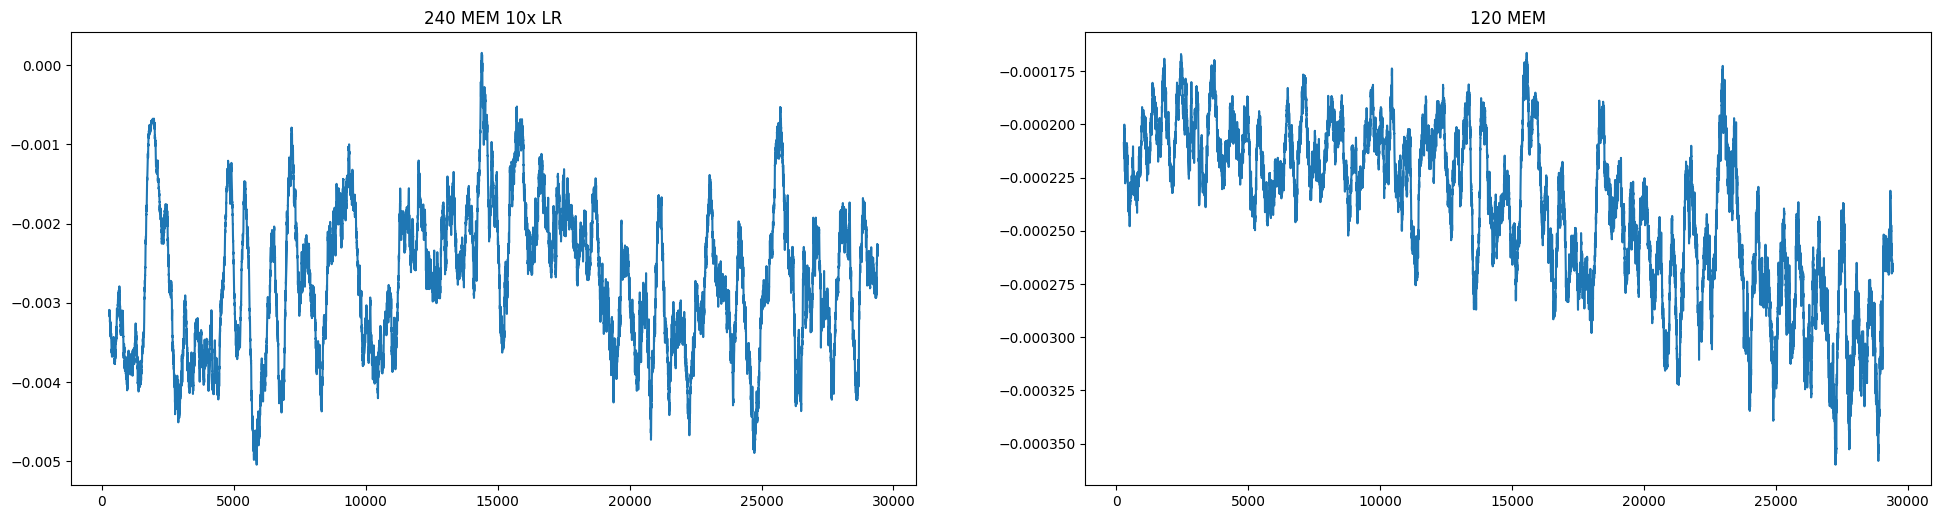

In [4]:
data = actorLosses["loss"]
dataC = actorLossesC["loss"]

dataC = dataC[:len(data)]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(24,6))
data.rolling(window=len(data)//100).mean().plot(y="loss", ax=axes[0], title=title)
dataC.rolling(window=len(dataC)//100).mean().plot(y="loss", ax=axes[1], title=titleC)

<AxesSubplot:title={'center':'120 MEM'}>

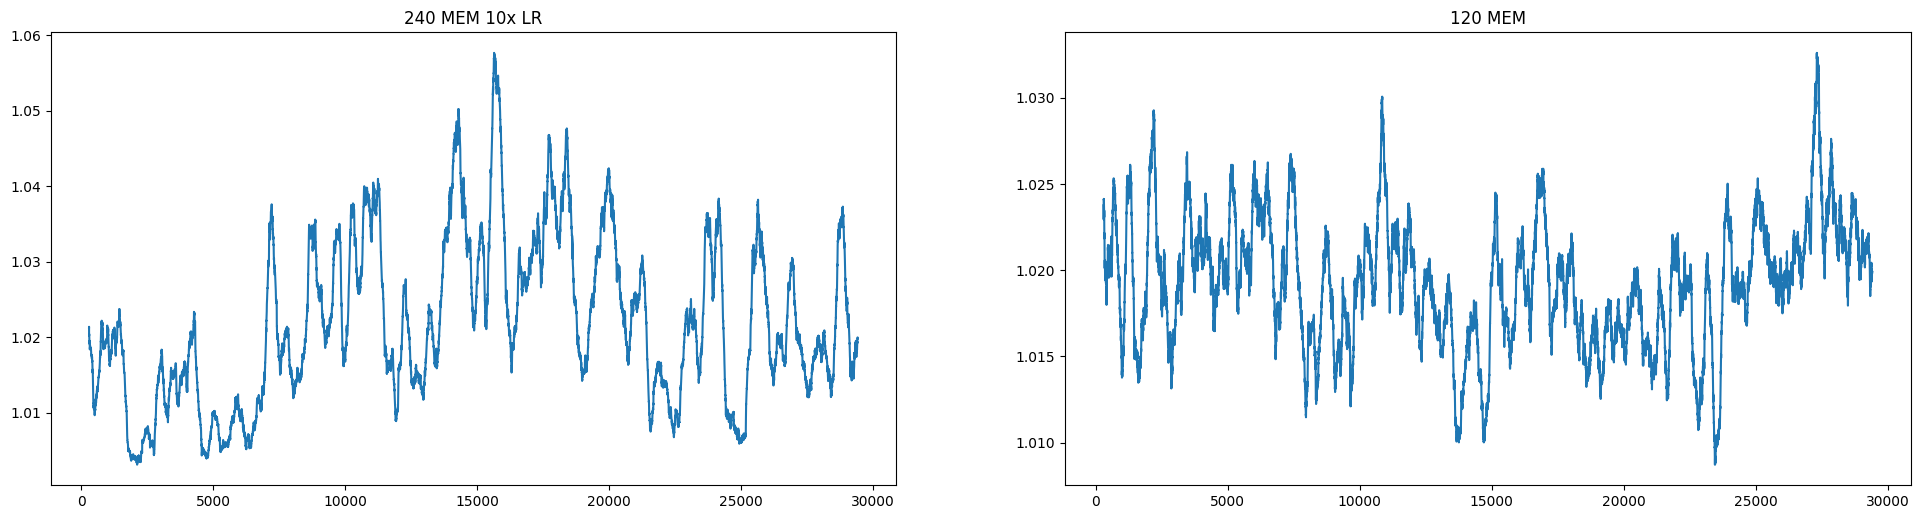

In [5]:
data = criticLosses["loss"]
dataC = criticLossesC["loss"]

dataC = dataC[:len(data)]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(24,6))
data.rolling(window=len(data)//100).mean().plot(y="loss", ax=axes[0], title=title)
dataC.rolling(window=len(dataC)//100).mean().plot(y="loss", ax=axes[1], title=titleC)


240 MEM 10x LR
ballGateTraj   -1.198118
toBallTraj     -0.302182
dtype: float64

120 MEM
ballGateTraj   -1.282387
toBallTraj     -0.160166
dtype: float64


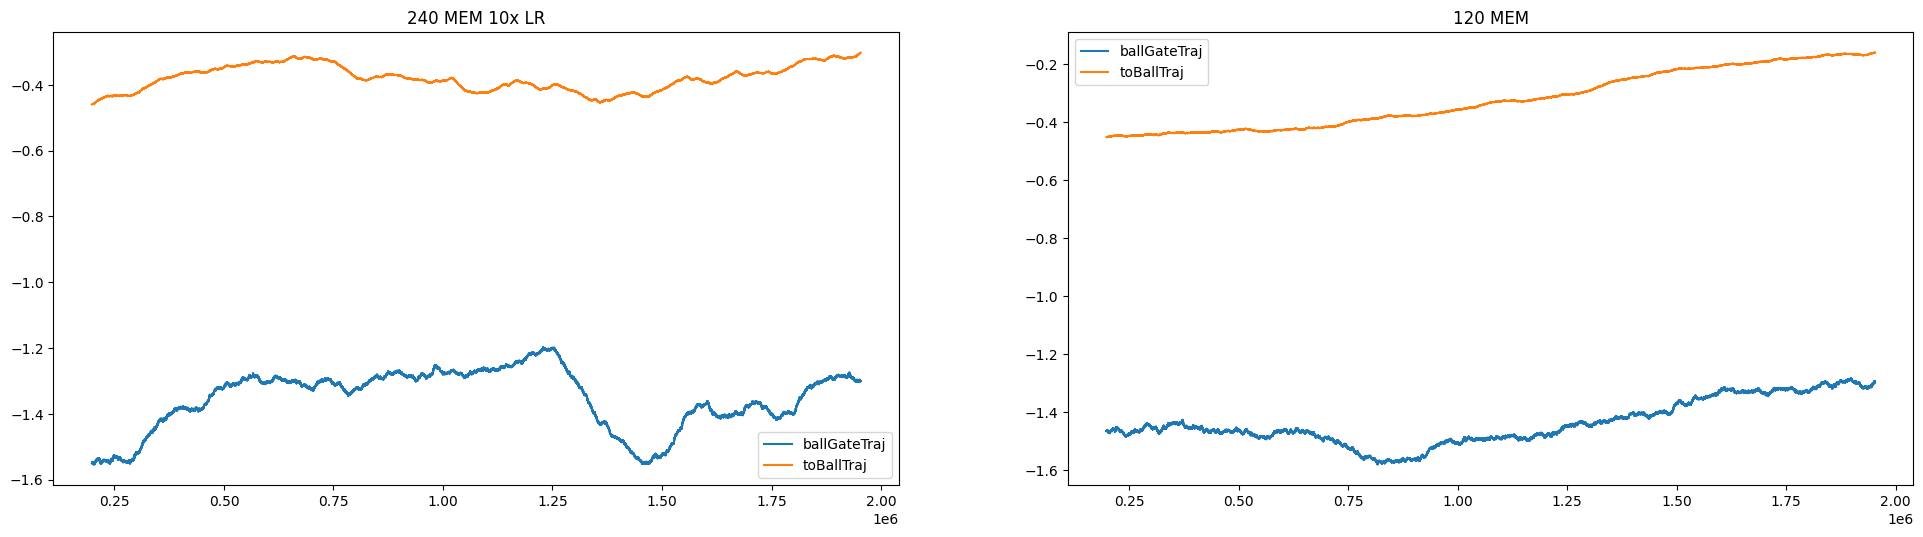

In [6]:
data = experiences[["ballGateTraj", "toBallTraj"]]
data = data.dropna()
dataC =experiencesC[["ballGateTraj", "toBallTraj"]]
dataC = dataC.dropna()
roll = data.rolling(window=int(groupSize)).mean()
rollC = dataC.rolling(window=int(groupSize)).mean()
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(24,6))
roll.plot(title=title, ax=axes[0])
rollC.plot(title=titleC, ax=axes[1])
print(title)
print(roll.max())
print()
print(titleC)
print(rollC.max())


240 MEM 10x LR
0    74.336102
dtype: float64

120 MEM
0    67.865969
dtype: float64


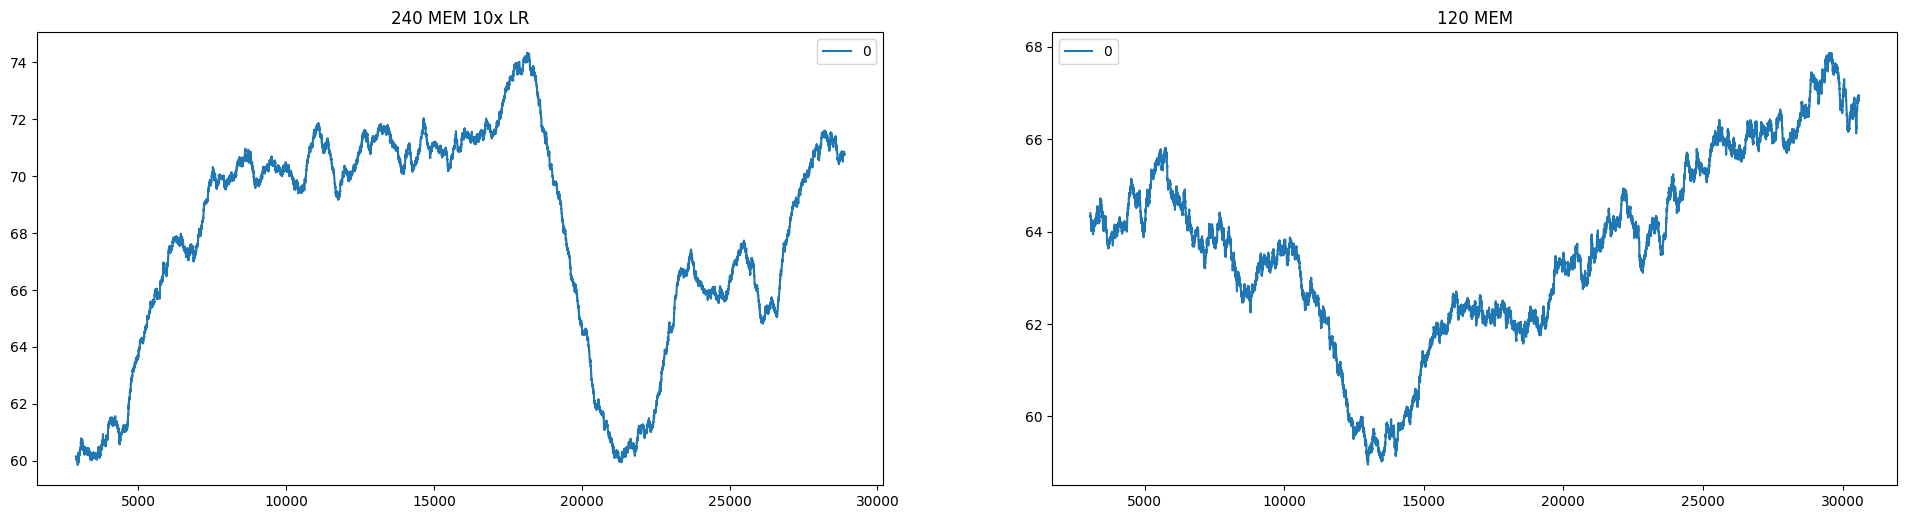

In [7]:
episodeLengths = []
currentEpisodeLength = 1
for row in experiences.itertuples():
    if row.done:
        episodeLengths.append(currentEpisodeLength)
        currentEpisodeLength = 1
    else:
        currentEpisodeLength += 1
episodeLengths.append(currentEpisodeLength)

episodeLengthsC = []
currentEpisodeLength = 1
for row in experiencesC.itertuples():
    if row.done:
        episodeLengthsC.append(currentEpisodeLength)
        currentEpisodeLength = 1
    else:
        currentEpisodeLength += 1
episodeLengthsC.append(currentEpisodeLength)

episodeLengths = pd.DataFrame(episodeLengths)
episodeLengthsC = pd.DataFrame(episodeLengthsC)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(24,6))

roll = episodeLengths.rolling(window=len(episodeLengths)//10).mean()
rollC = episodeLengthsC.rolling(window=len(episodeLengthsC)//10).mean()
roll.plot(title=title, ax=axes[0])
rollC.plot(title=titleC, ax=axes[1])
print(title)
print(roll.max())
print()
print(titleC)
print(rollC.max())